<a href="https://colab.research.google.com/github/minseojeong1012/202104349/blob/master/%EC%82%B0%EC%97%85%EB%B3%84_%EC%A4%91%EC%86%8C%EA%B8%B0%EC%97%85_%EC%A7%80%EC%9B%90_%ED%98%84%ED%99%A9_%EB%B6%84%EC%84%9D_%EB%B0%8F_%EC%A0%84%EB%9E%B5_%EC%A0%9C%EC%95%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
central_data_path = '/content/2023년_중소기업지원사업_현황(중앙부처).csv'
local_data_path = '/content/2023년_중소기업지원사업_현황(지자체).csv'

central_data = pd.read_csv(central_data_path, encoding='utf-8')
local_data = pd.read_csv(local_data_path, encoding='utf-8')

# 데이터 확인
print("Central Data Sample:")
print(central_data.head())
print("\nLocal Data Sample:")
print(local_data.head())

Central Data Sample:
   연번   소관명               세부사업명  예산(백만원)
0   1  중앙부처        지역특화산업육성(세종)     2796
1   2  중앙부처  지역특화산업육성+(R&D)(세종)     3026
2   3  중앙부처        지역특화산업육성(제주)     5013
3   4  중앙부처  지역특화산업육성+(R&D)(제주)     9002
4   5  중앙부처   기술지주회사자회사R&BD지원사업     2400

Local Data Sample:
   연번 지자체명           세부사업명    예산(백만원)  
0   1   서울   도시형제조업(소공인)지원         1746
1   2   서울     서울형특화산업지구운영         2323
2   3   서울      양재AI혁신지구육성        13666
3   4   서울     홍릉바이오의료앵커운영        12608
4   5   서울  게임산업육성및e스포츠활성화         2286


In [3]:
# 산업 카테고리 세분화 함수
def categorize_industry(row):
    if any(keyword in row for keyword in ["AI", "인공지능", "머신러닝", "딥러닝", "빅데이터", "알고리즘", "자율주행", "컴퓨터 비전"]):
        return "AI"
    elif any(keyword in row for keyword in ["바이오", "생명", "제약", "의료", "유전체", "바이오테크", "생물", "헬스케어", "백신"]):
        return "Bio"
    elif any(keyword in row for keyword in ["제조", "공업", "소공인", "생산", "기계", "자동화", "공정", "로봇", "스마트팩토리", "3D 프린팅"]):
        return "Manufacturing"
    elif any(keyword in row for keyword in ["IT", "정보", "통신", "데이터", "소프트웨어", "클라우드", "네트워크", "사이버보안", "모바일", "IoT", "앱 개발"]):
        return "IT"
    elif any(keyword in row for keyword in ["에너지", "환경", "친환경", "지속 가능", "재생 에너지", "탄소", "기후", "태양광", "풍력", "전기", "배터리"]):
        return "Energy/Environment"
    elif any(keyword in row for keyword in ["문화", "콘텐츠", "예술", "디자인", "미디어", "게임", "영상", "음악", "출판", "광고", "공연"]):
        return "Culture/Content"
    elif any(keyword in row for keyword in ["농업", "어업", "축산", "농수산", "식량", "작물", "수산", "농기계", "스마트팜", "식품", "유통"]):
        return "Agriculture/Fishery"
    else:
        return "Other"


# 산업 카테고리 추가
central_data['산업'] = central_data['세부사업명'].apply(categorize_industry)
local_data['산업'] = local_data['세부사업명'].apply(categorize_industry)


In [3]:
print(local_data.columns)

Index(['연번', '지자체명', '세부사업명', '  예산(백만원)  ', '산업'], dtype='object')


In [4]:
# 결측치 제거
central_data.dropna(subset=['예산(백만원)'], inplace=True)
local_data.dropna(subset=['  예산(백만원)  '], inplace=True)

# 데이터 통합
combined_data = pd.concat([central_data, local_data], axis=0)

# 확인
print("Combined Data Sample:")
print(combined_data[['세부사업명', '산업', '예산(백만원)']].head())


Combined Data Sample:
                세부사업명     산업  예산(백만원)
0        지역특화산업육성(세종)  Other   2796.0
1  지역특화산업육성+(R&D)(세종)  Other   3026.0
2        지역특화산업육성(제주)  Other   5013.0
3  지역특화산업육성+(R&D)(제주)  Other   9002.0
4   기술지주회사자회사R&BD지원사업  Other   2400.0


In [5]:
# 산업별 예산 합계 계산
industry_budget = combined_data.groupby('산업')['예산(백만원)'].sum().reset_index()

# 비율 계산
total_budget = industry_budget['예산(백만원)'].sum()
industry_budget['비율(%)'] = (industry_budget['예산(백만원)'] / total_budget) * 100

# 결과 확인
print(industry_budget)

                    산업     예산(백만원)      비율(%)
0                   AI    181645.0   0.559226
1  Agriculture/Fishery   1439477.0   4.431684
2                  Bio    186090.0   0.572911
3      Culture/Content    768210.0   2.365070
4   Energy/Environment   2123945.0   6.538940
5                   IT    446980.0   1.376107
6        Manufacturing    362140.0   1.114912
7                Other  26973003.0  83.041151


In [6]:
# Other 제외
filtered_data = combined_data[combined_data['산업'] != 'Other']

# 산업별 예산 합계 계산
industry_budget_filtered = filtered_data.groupby('산업')['예산(백만원)'].sum().reset_index()

# 비율 계산
total_budget_filtered = industry_budget_filtered['예산(백만원)'].sum()
industry_budget_filtered['비율(%)'] = (industry_budget_filtered['예산(백만원)'] / total_budget_filtered) * 100

# 결과 확인
print(industry_budget_filtered)


                    산업    예산(백만원)      비율(%)
0                   AI   181645.0   3.297548
1  Agriculture/Fishery  1439477.0  26.131985
2                  Bio   186090.0   3.378242
3      Culture/Content   768210.0  13.945935
4   Energy/Environment  2123945.0  38.557684
5                   IT   446980.0   8.114388
6        Manufacturing   362140.0   6.574219


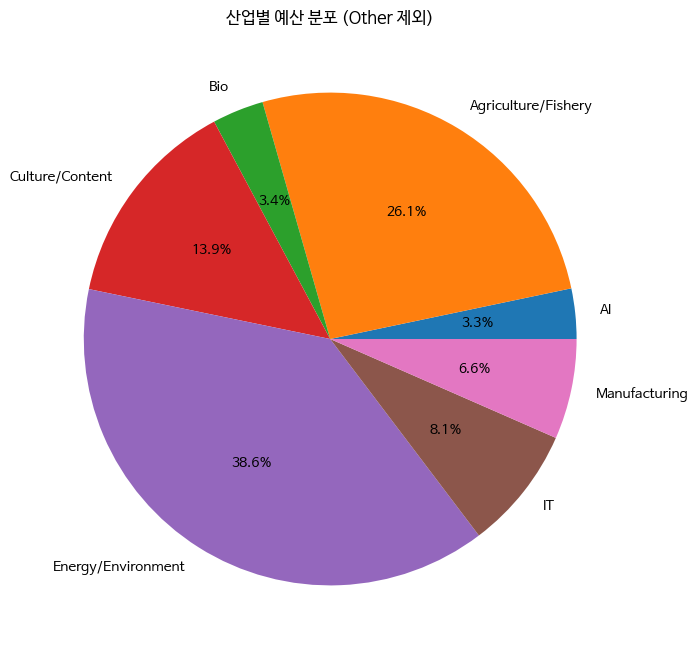

In [7]:
# 산업별 예산 분포 파이 차트
plt.figure(figsize=(8, 8))
plt.pie(industry_budget_filtered['예산(백만원)'], labels=industry_budget_filtered['산업'], autopct='%1.1f%%')
plt.title('산업별 예산 분포 (Other 제외)')
plt.show()


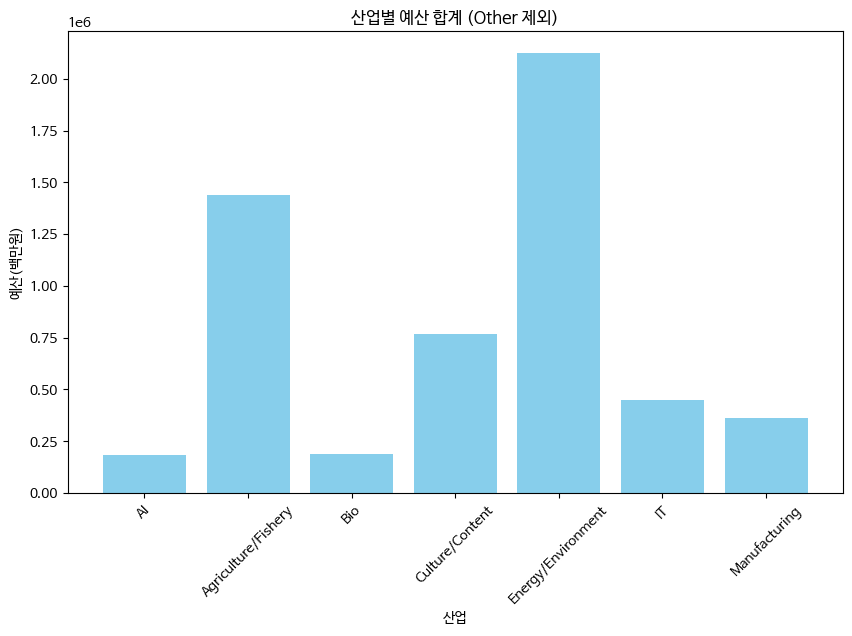

In [8]:
# 산업별 예산 합계 바 차트
plt.figure(figsize=(10, 6))
plt.bar(industry_budget_filtered['산업'], industry_budget_filtered['예산(백만원)'], color='skyblue')
plt.title('산업별 예산 합계 (Other 제외)')
plt.xlabel('산업')
plt.ylabel('예산(백만원)')
plt.xticks(rotation=45)
plt.show()
